In [25]:

import pandas as pd  # read and wrangle dataframes
import matplotlib.pyplot as plt # visualization
import seaborn as sns # statistical visualizations and aesthetics
from sklearn.base import TransformerMixin # To create new classes for transformations
from sklearn.preprocessing import (FunctionTransformer, StandardScaler) # preprocessing 
from sklearn.decomposition import PCA # dimensionality reduction
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from scipy.stats import boxcox # data transform
from sklearn.model_selection import (train_test_split, KFold , StratifiedKFold, 
                                     cross_val_score, GridSearchCV, 
                                     learning_curve, validation_curve) # model selection modules
from sklearn.pipeline import Pipeline # streaming pipelines
from sklearn.base import BaseEstimator, TransformerMixin # To create a box-cox transformation class
from collections import Counter
from sklearn.metrics import confusion_matrix
import warnings
# load models
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import (XGBClassifier, plot_importance)
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,auc
from sklearn.svm import SVC
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from time import time
import numpy as np

%matplotlib inline 
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

In [6]:
data = pd.read_csv('/content/drive/MyDrive/7151CEM Computing individual project/MentalHealth_final2.csv')
features = data.columns[:-1].tolist()
print(data.shape)

(27, 14)


In [7]:
data.head()

,job,job_difficulty(scale 1-10),work_wellbeing(scale 1-10),statement,tran_age,tran_physicalAvty_hrs,tran_MH_interfereWrk,tran_frequently_work_pressure,tran_obesity_impactMH,tran_fmlyMember_obesity,tran_overweight,tran_negative_impactMH,tran_sad_depressed,tran_personalRship_MH
0,1,6,8,0,1,1,0,4,2,0,2,2,0,0
1,1,2,2,0,1,1,4,3,0,0,0,1,3,3
2,1,7,7,1,2,3,3,4,2,0,0,0,3,4
3,1,3,4,0,1,0,1,1,1,1,0,1,1,1
4,1,8,6,1,1,2,4,2,2,2,2,2,3,3


In [8]:
data.dtypes

job                              int64
job_difficulty(scale 1-10)       int64
work_wellbeing(scale 1-10)       int64
statement                        int64
tran_age                         int64
tran_physicalAvty_hrs            int64
tran_MH_interfereWrk             int64
tran_frequently_work_pressure    int64
tran_obesity_impactMH            int64
tran_fmlyMember_obesity          int64
tran_overweight                  int64
tran_negative_impactMH           int64
tran_sad_depressed               int64
tran_personalRship_MH            int64
dtype: object

In [9]:
data['job'].value_counts()

1    24
0     3
Name: job, dtype: int64

In [10]:
data.describe()

,job,job_difficulty(scale 1-10),work_wellbeing(scale 1-10),statement,tran_age,tran_physicalAvty_hrs,tran_MH_interfereWrk,tran_frequently_work_pressure,tran_obesity_impactMH,tran_fmlyMember_obesity,tran_overweight,tran_negative_impactMH,tran_sad_depressed,tran_personalRship_MH
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,0.888889,5.037037,4.925926,0.814815,1.370370,1.333333,2.037037,3.074074,1.222222,0.518519,0.407407,1.185185,2.518519,2.407407
std,0.320256,1.950966,2.615427,0.395847,0.492103,0.877058,1.675192,0.916764,0.506370,0.700020,0.797074,0.962250,1.602171,1.623369
min,0.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.500000,2.000000,1.000000,1.000000,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.500000,1.500000,0.500000
50%,1.000000,5.000000,5.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,0.000000,0.000000,1.000000,3.000000,3.000000
75%,1.000000,6.500000,7.500000,1.000000,2.000000,2.000000,4.000000,4.000000,1.500000,1.000000,0.000000,2.000000,4.000000,4.000000
max,1.000000,8.000000,10.000000,1.000000,2.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000,3.000000,4.000000,4.000000


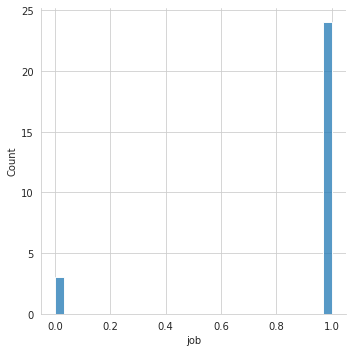

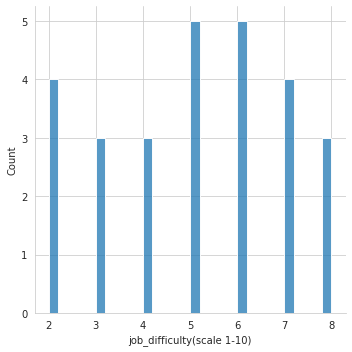

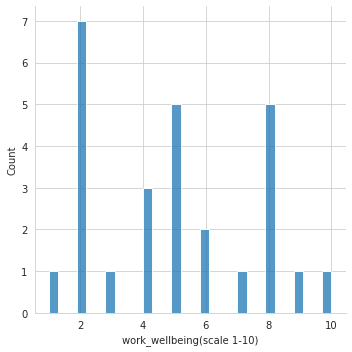

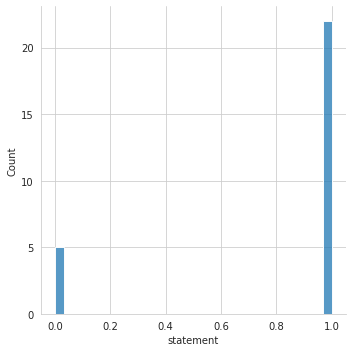

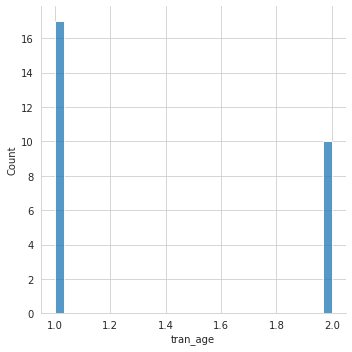

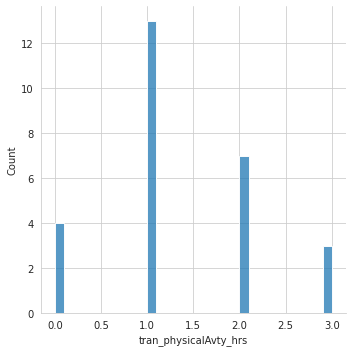

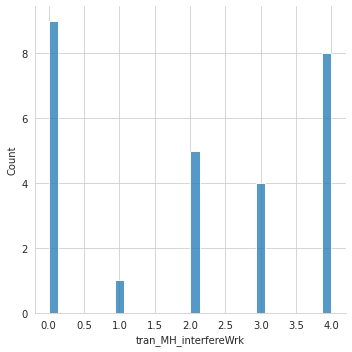

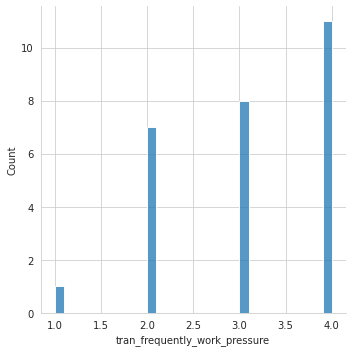

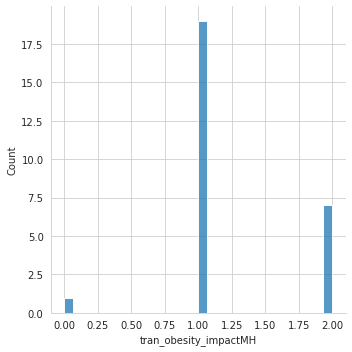

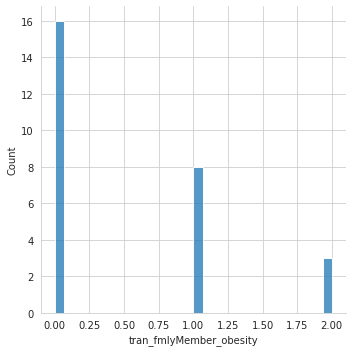

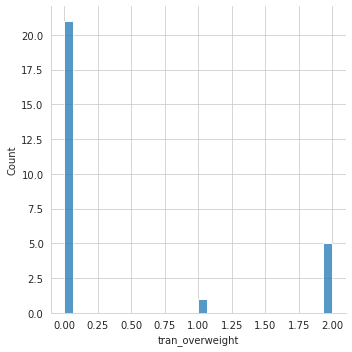

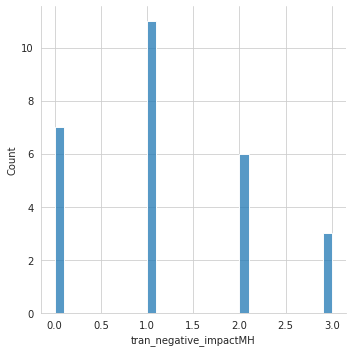

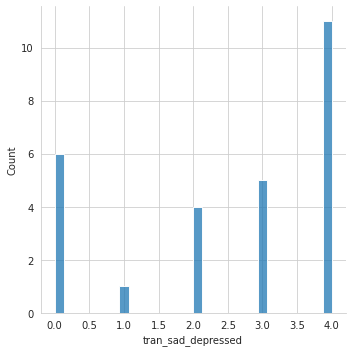

In [12]:
for feat in features:
  skew = data[feat].skew()
  sns.displot(data[feat], kde=False, label = 'Skew = %.3f' %(skew), bins=30)

<Figure size 576x576 with 0 Axes>

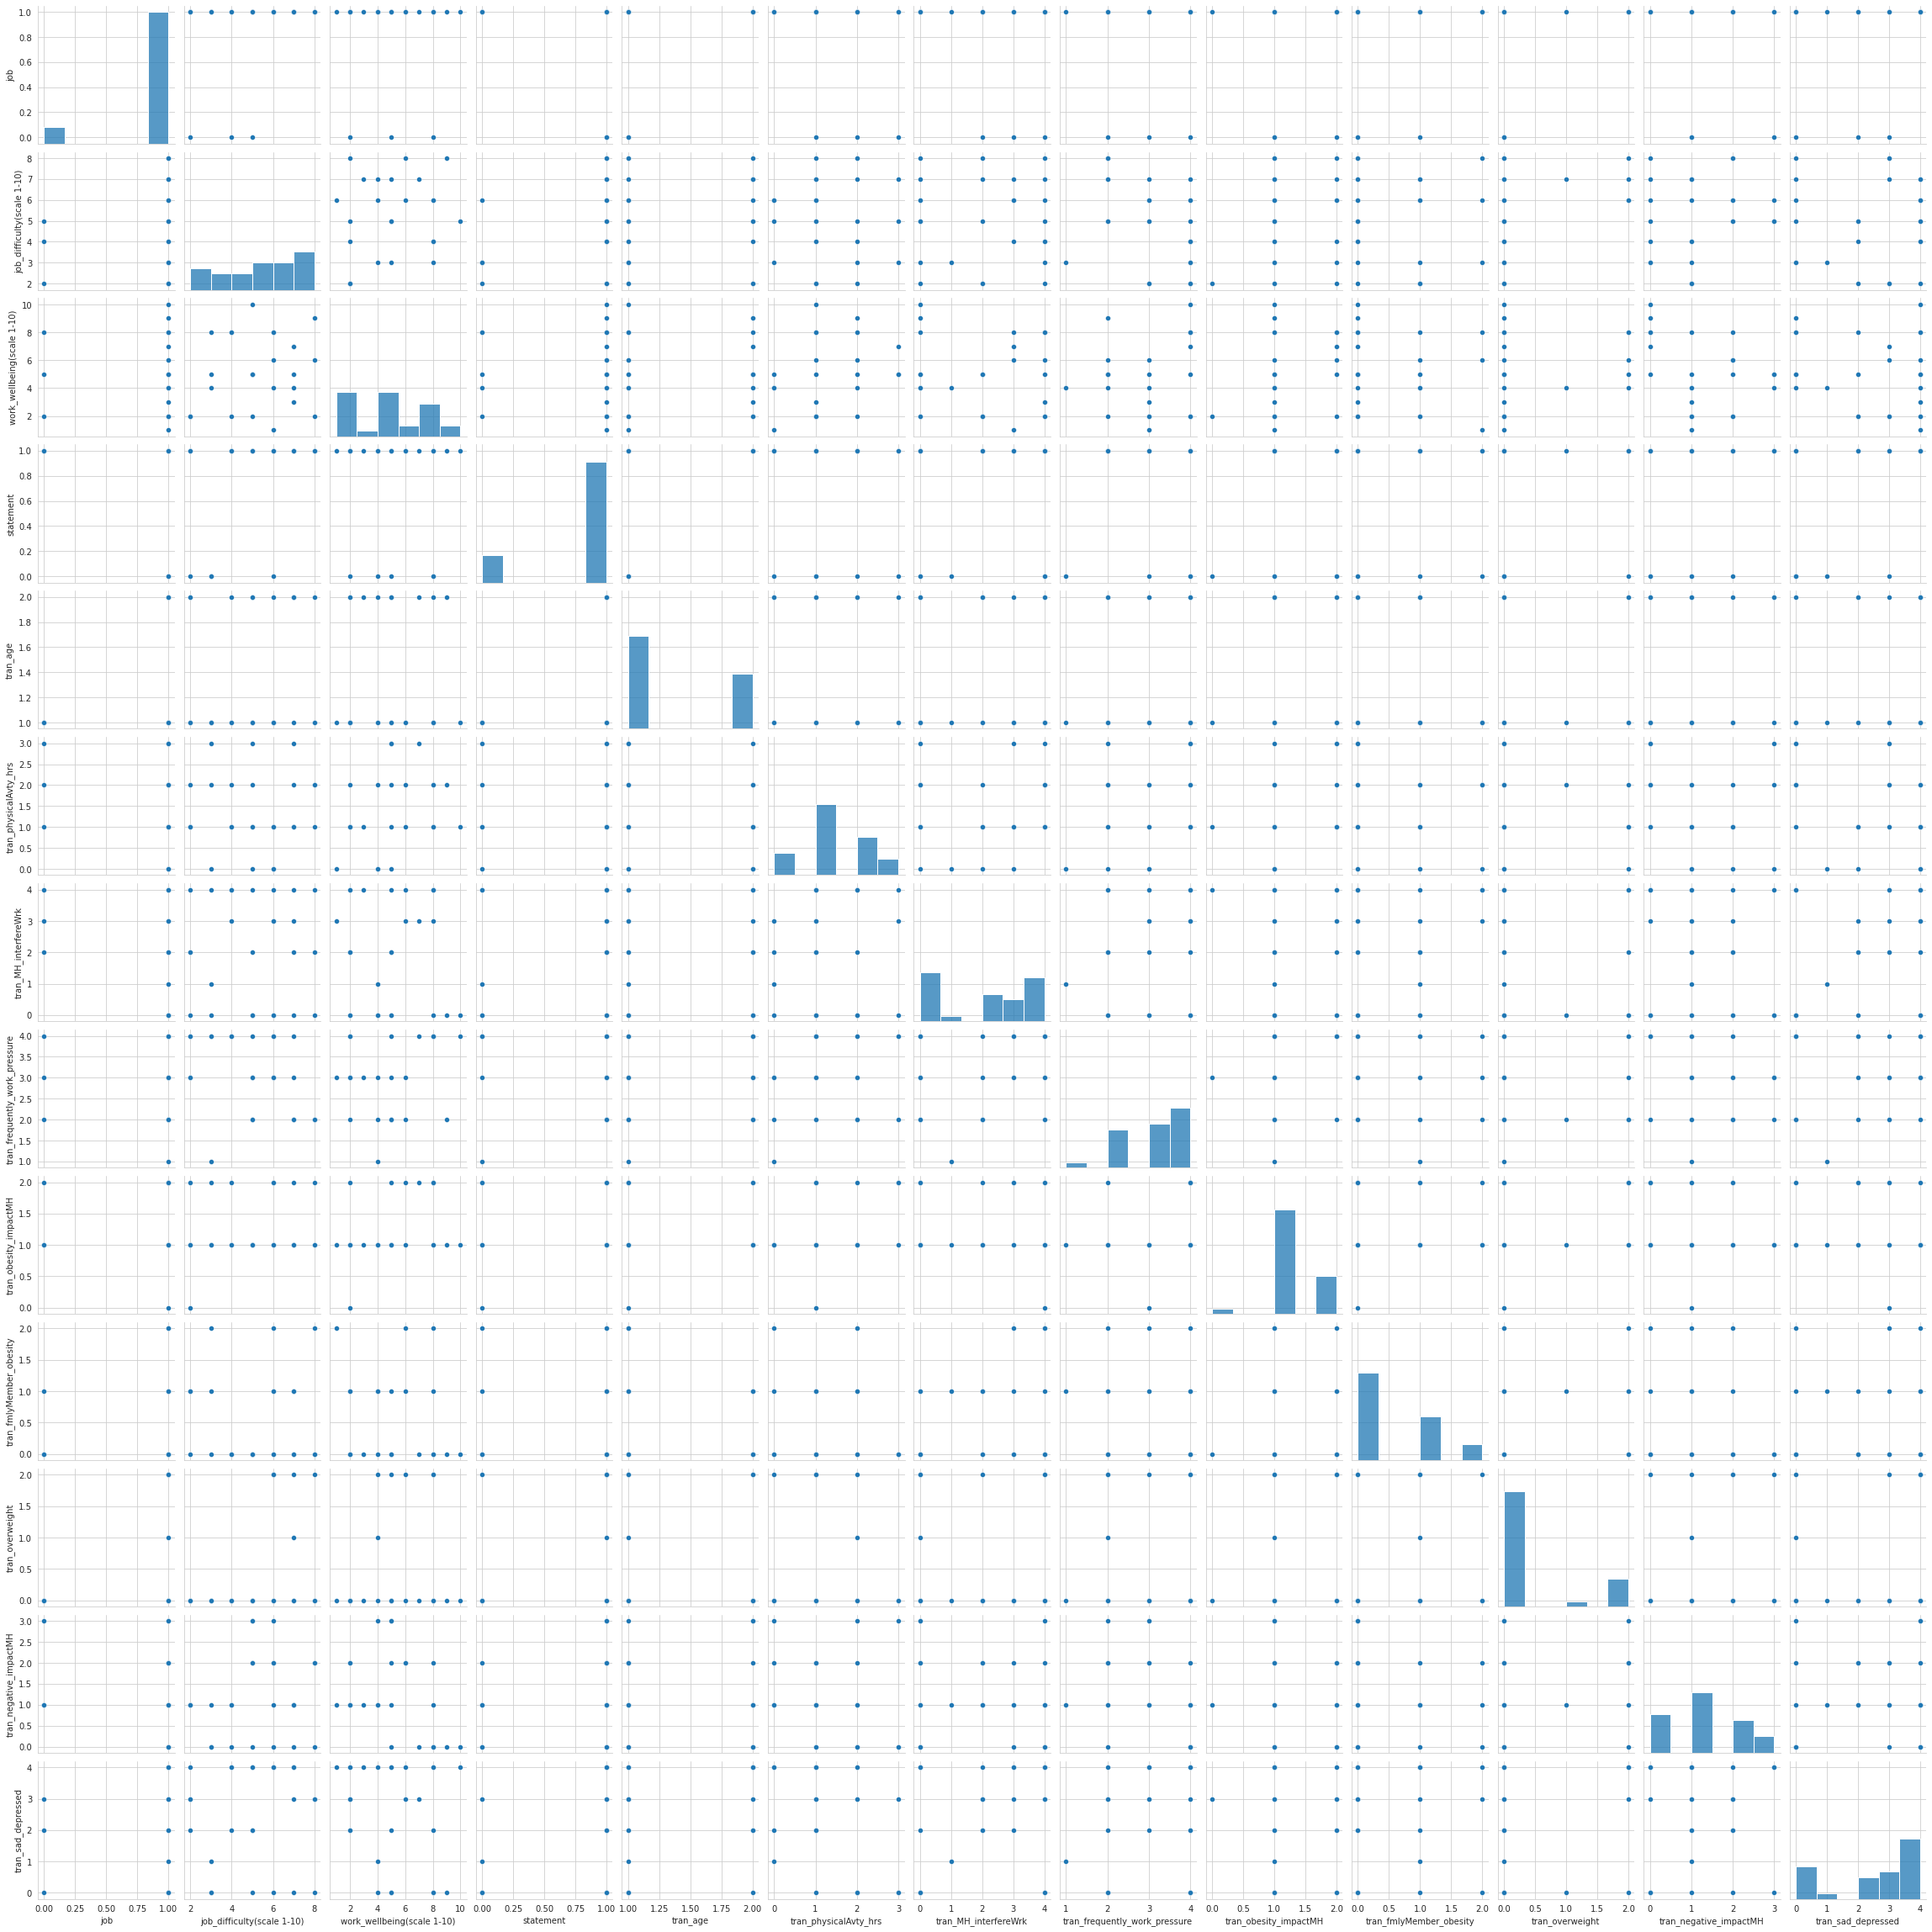

In [13]:
plt.figure(figsize=(8,8))
sns.pairplot(data[features], palette='coolwarm')
plt.show()

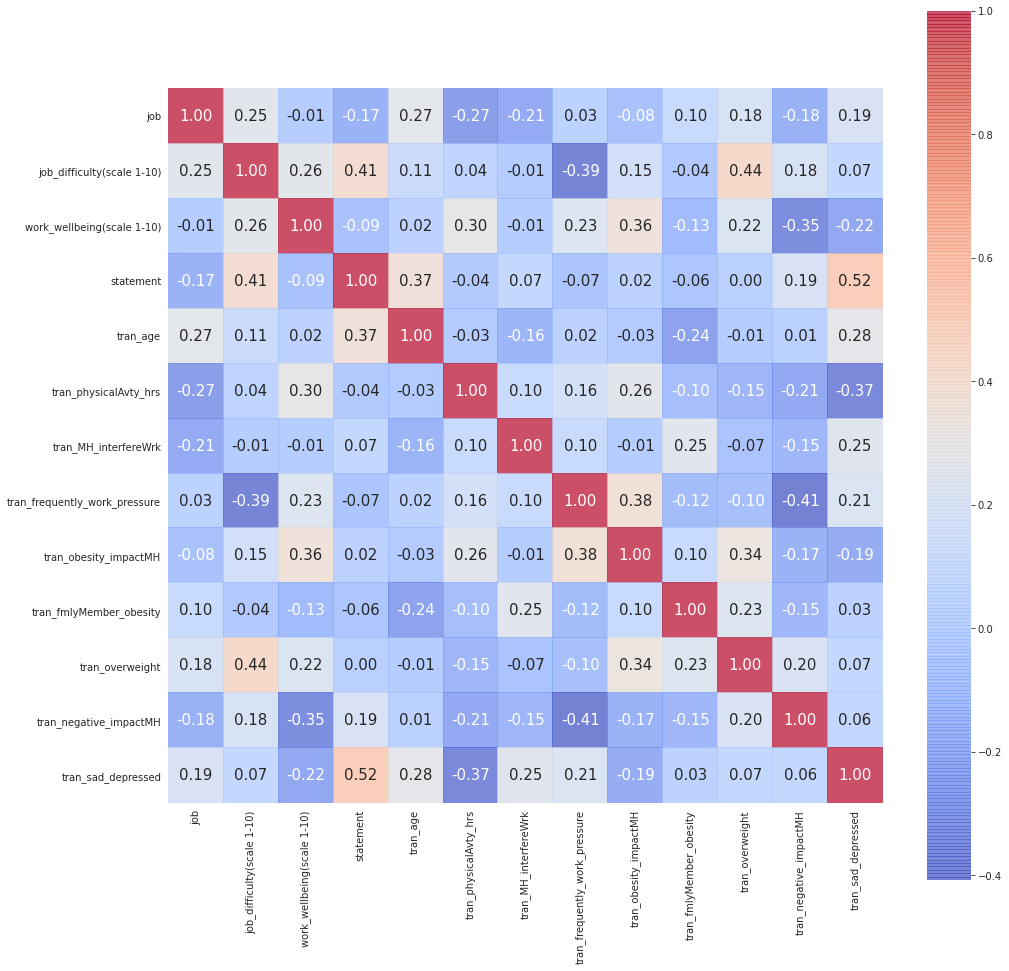

In [14]:
corr = data[features].corr()
plt.figure(figsize=(16,16))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= features, yticklabels= features, alpha = 0.7,   cmap= 'coolwarm')
plt.show()

In [15]:

X = data[features] 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
y = data['tran_overweight'] 
# set a seed and a test size for splitting the dataset 
seed = 70
test_size = 0.2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size , random_state = seed)

In [16]:
data.describe()

,job,job_difficulty(scale 1-10),work_wellbeing(scale 1-10),statement,tran_age,tran_physicalAvty_hrs,tran_MH_interfereWrk,tran_frequently_work_pressure,tran_obesity_impactMH,tran_fmlyMember_obesity,tran_overweight,tran_negative_impactMH,tran_sad_depressed,tran_personalRship_MH
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,0.888889,5.037037,4.925926,0.814815,1.370370,1.333333,2.037037,3.074074,1.222222,0.518519,0.407407,1.185185,2.518519,2.407407
std,0.320256,1.950966,2.615427,0.395847,0.492103,0.877058,1.675192,0.916764,0.506370,0.700020,0.797074,0.962250,1.602171,1.623369
min,0.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.500000,2.000000,1.000000,1.000000,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.500000,1.500000,0.500000
50%,1.000000,5.000000,5.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,0.000000,0.000000,1.000000,3.000000,3.000000
75%,1.000000,6.500000,7.500000,1.000000,2.000000,2.000000,4.000000,4.000000,1.500000,1.000000,0.000000,2.000000,4.000000,4.000000
max,1.000000,8.000000,10.000000,1.000000,2.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000,3.000000,4.000000,4.000000


Elapsed time to train XGBoost  0.162 seconds


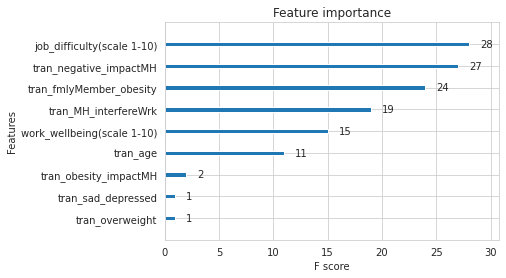

In [17]:
model_importances = XGBClassifier()
start = time()
model_importances.fit(X_train, y_train)
print('Elapsed time to train XGBoost  %.3f seconds' %(time()-start))
plot_importance(model_importances)
plt.show()

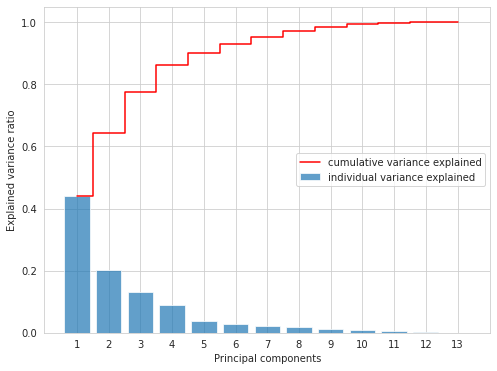

In [18]:
pca = PCA(random_state = seed)
pca.fit(X_train)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
plt.figure(figsize=(8,6))
plt.bar(range(1,len(cum_var_exp)+1), var_exp, align= 'center', label= 'individual variance explained', \
       alpha = 0.7)
plt.step(range(1,len(cum_var_exp)+1), cum_var_exp, where = 'mid' , label= 'cumulative variance explained', \
        color= 'red')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.xticks(np.arange(1,len(var_exp)+1,1))
plt.legend(loc='center right')
plt.show()


In [19]:
clf = RandomForestClassifier(n_estimators=100)
clf = clf.fit(X_train, y_train.ravel())
scores = cross_val_score(clf, X_train, y_train.ravel(), cv=10)
scores.mean()
y_pred_clf_train = clf.predict(X_train)
accuracy_clf_train = accuracy_score(y_train, y_pred_clf_train)
print("Training set: ", accuracy_clf_train)
y_pred_clf_test = clf.predict(X_test)
accuracy_clf_test = accuracy_score(y_test, y_pred_clf_test)
print("Test set: ", accuracy_clf_test)

Training set:  1.0
Test set:  0.8333333333333334


In [26]:
#confusionmatrix for random forest
confusion_matrix(y_test, y_pred_clf_test)

array([[4, 0, 0],
       [1, 0, 0],
       [0, 0, 1]])

In [21]:
#confusion matrix metrices for Random forest
matrix = classification_report(y_test, y_pred_clf_test)
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       0.00      0.00      0.00         1
           2       1.00      1.00      1.00         1

    accuracy                           0.83         6
   macro avg       0.60      0.67      0.63         6
weighted avg       0.70      0.83      0.76         6



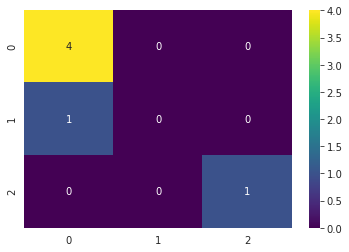

In [22]:
#Random forest
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_clf_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()

In [23]:
from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(X_train, y_train.ravel())
y_pred_nb_train = classifier_nb.predict(X_train)
accuracy_nb_train = accuracy_score(y_train, y_pred_nb_train)
print("Training set: ", accuracy_nb_train)

y_pred_nb_test = classifier_nb.predict(X_test)
accuracy_nb_test = accuracy_score(y_test, y_pred_nb_test)
print("Test set: ", accuracy_nb_test)

Training set:  1.0
Test set:  0.8333333333333334


In [24]:
#confusionmatrix for Naive Bayes
confusion_matrix(y_test, y_pred_nb_test)

array([[4, 0, 0],
       [0, 0, 1],
       [0, 0, 1]])

In [27]:
#classification report metrices for Naive_bayes
matrix = classification_report(y_test, y_pred_nb_test)
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.00      0.00      0.00         1
           2       0.50      1.00      0.67         1

    accuracy                           0.83         6
   macro avg       0.50      0.67      0.56         6
weighted avg       0.75      0.83      0.78         6



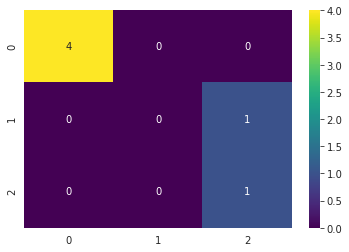

In [28]:

from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_nb_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()

In [31]:
NaiveBayes_fpr, NaiveBayes_tpr, threshold = roc_curve(y_test, y_pred_nb_test, pos_label='your_label')
auc_NaiveBayes = auc(NaiveBayes_fpr, NaiveBayes_tpr)

RandomForest_fpr, RandomForest_tpr, threshold = roc_curve(y_test, y_pred_clf_test, pos_label='your_label')
auc_Rf = auc(RandomForest_fpr, RandomForest_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(NaiveBayes_fpr, NaiveBayes_tpr,marker='.',label='Naive Bayes(auc=%0.3f)'% auc_NaiveBayes)
plt.plot(RandomForest_fpr, RandomForest_tpr,marker='.',label='Random Forest(auc=%0.3f)'% auc_Rf)
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()
plt.show()

TypeError: ignored